In [1]:
import json
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


In [2]:
with open('../newest_ts', 'r') as f:
    ts = f.read()

data_path = f"../data/data_{ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

In [3]:
def ts2dt(ts, format='%Y-%m-%d %H:%M:%S'):
    return (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    .astimezone(tz.tzlocal())
                    .strftime(format))

print(f"Recent query happens at {ts2dt(ts)}")

Recent query happens at 2021-08-22 21:37:27


In [4]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly', 'daily'])

In [5]:
data['current']

{'dt': 1629668247,
 'sunrise': 1629669780,
 'sunset': 1629715720,
 'temp': 28.73,
 'feels_like': 35.04,
 'pressure': 1007,
 'humidity': 85,
 'dew_point': 25.95,
 'uvi': 0,
 'clouds': 78,
 'visibility': 10000,
 'wind_speed': 3.63,
 'wind_deg': 218,
 'wind_gust': 4.7,
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}]}

In [6]:
data['hourly'][0]

{'dt': 1629666000,
 'temp': 28.49,
 'feels_like': 34.12,
 'pressure': 1007,
 'humidity': 84,
 'dew_point': 25.52,
 'uvi': 0,
 'clouds': 81,
 'visibility': 10000,
 'wind_speed': 2.77,
 'wind_deg': 220,
 'wind_gust': 3.9,
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'pop': 0.72,
 'rain': {'1h': 0.4}}

In [7]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

In [8]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629666000,28.49,34.12,1007,84,25.52,0.00,81,10000,2.77,220,3.90,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.72,{'1h': 0.4}
1,1629669600,28.73,35.04,1007,85,25.95,0.00,78,10000,3.63,218,4.70,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.67,NaN
2,1629673200,28.59,34.41,1007,84,25.62,0.40,79,10000,3.73,224,5.11,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.70,NaN
3,1629676800,28.74,34.43,1007,82,25.36,1.70,80,10000,3.48,222,4.91,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.66,NaN
4,1629680400,29.10,34.58,1008,78,24.87,4.24,47,10000,3.55,228,4.73,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.58,{'1h': 0.25}


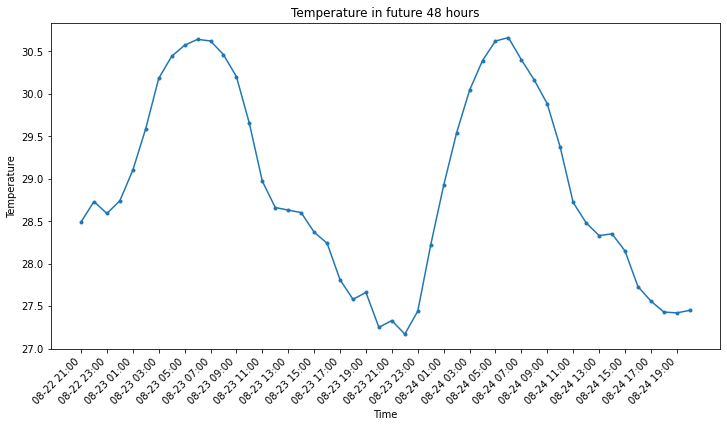

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M') for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
plt.show()